# Discussion 1 - Part 2

Part 2:  Every week, I want you to share Python coding as a Team.  To start, go to Kaggle.com and sign up for the Titanic: Machine Learning Through Disaster competition. https://www.kaggle.com/c/titanic (Links to an external site.)Links to an external site.

Download the train.csv dataset and run some basic descriptive statistics and graphs for two or more variables of your choosing using Python.  Provide your Python code here, perhaps as a Jupyter notebook .html file on GitHub.  Embed at least one graph in your discussion by using the "Files" link in the upper right portion of Canvas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
titanic = pd.read_csv("/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 1/train.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

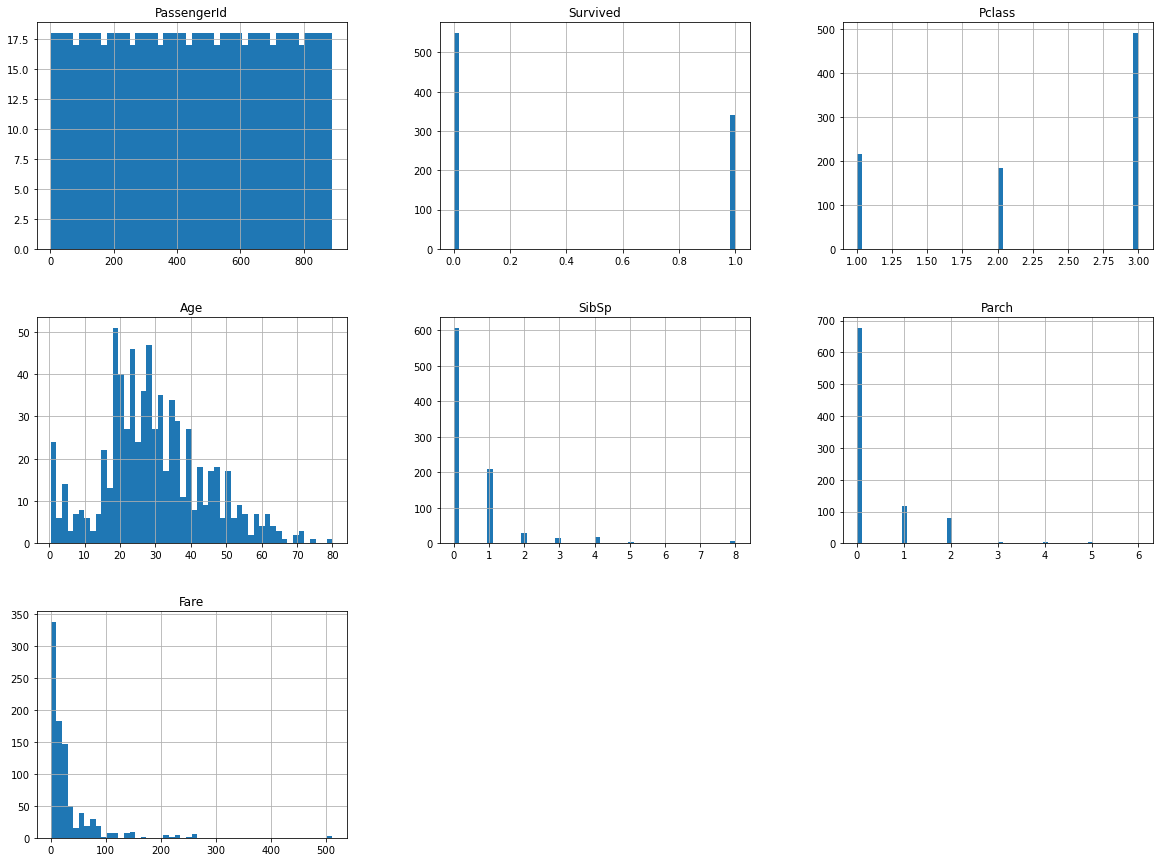

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize=(20,15))
plt.show()

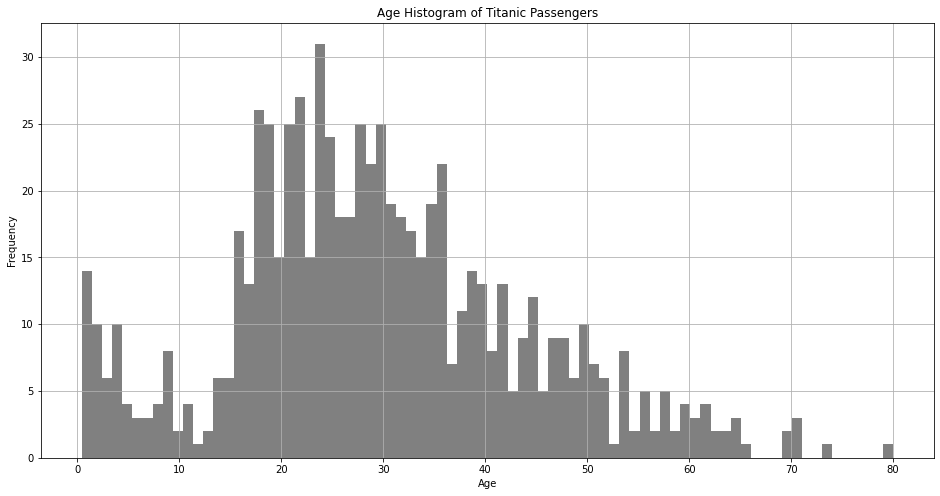

In [19]:
#Looking at the passenger ages
titanic['Age'].hist(bins = 80, figsize = (16,8), color = 'grey')
plt.title('Age Histogram of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

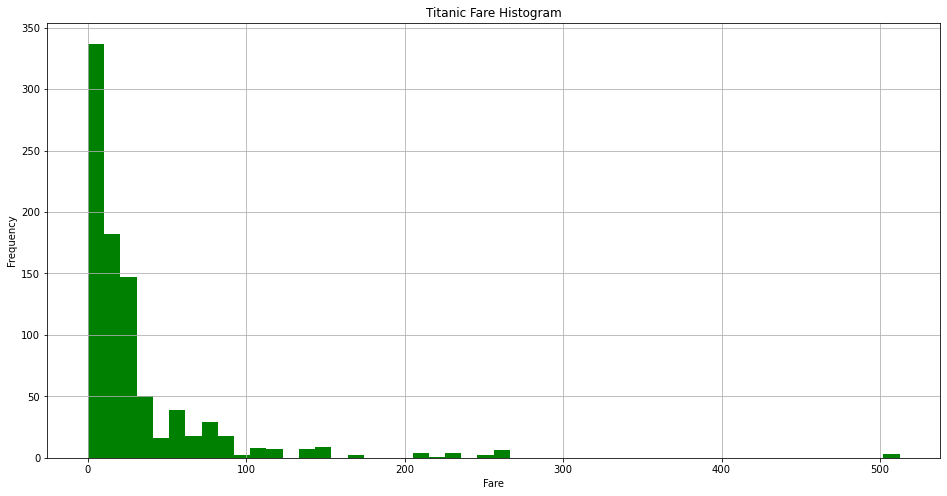

In [21]:
#Looking at the passenger fare
titanic['Fare'].hist(bins = 50, figsize = (16,8), color = "green")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Titanic Fare Histogram")
plt.show()

In [22]:
titanic_1 = titanic

In [23]:
titanic_1['Sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
a = titanic['Sex'].value_counts()

<BarContainer object of 2 artists>

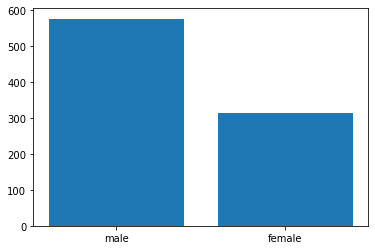

In [40]:
plt.bar(a.index, a.values)

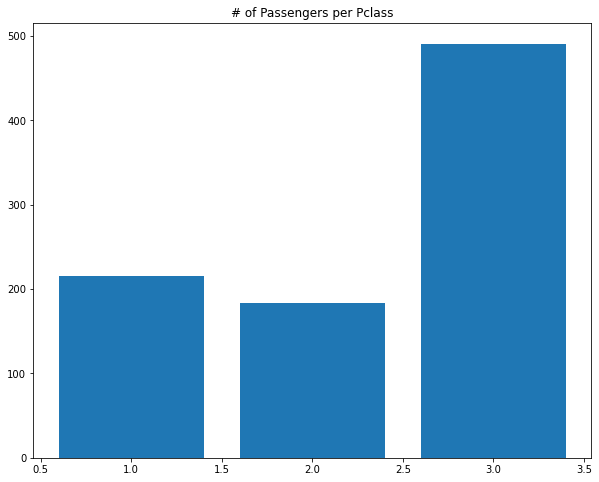

In [42]:
b = titanic['Pclass'].value_counts()
plt.figure(figsize = (10,8))
plt.bar(b.index, b.values)
plt.title('# of Passengers per Pclass')
plt.show()